<a href="https://colab.research.google.com/github/ggwnsghgg/FastCampus/blob/main/2021_2_22_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EC%A7%91%EA%B0%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Library & Data Import

In [ ]:
%matplotlib inline  # 시각화 라이브러리가 노트북 상에서 잘보여지도록 해주는 옵션
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 코드를 실행할때 출력되는 경고 문구를 보여주지 않도록 하는 라이브러리 ↓
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [ ]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### Feature Description
- TOWN : 지역 이름
- LON, LAT : 위도, 경도 정보
- **CMEDV : 해당 지역의 집값(중간값)**
- CRIM : 근방 범죄율
- ZN : 주택지 비율
- INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적
- CHAS : 경계선에 강에 있는지 여부
- NOX : 산화 질소 농도
- RM : 자택당 평균 방 갯수
- AGE : 1940 년 이전에 건설된 비율
- DIS : 5 개의 보스턴 고용 센터와의 거리에 다른 가중치 부여
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10000달러당 재산세
- PTRATIO : 지역별 학생-교사 비율
- B : 지역의 흑인 지수 (1000(B - 0.63)^2), B는 흑인의 비율.
- LSTAT : 빈곤층의 비율

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 회귀 분석 종속(목표) 변수 탐색

##### 데이터셋 기본 정보 탐색

In [ ]:
df.shape

(506, 17)

In [ ]:
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


##### 'CMEDV' 피처 탐색

In [ ]:
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

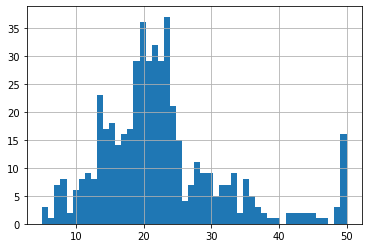

In [ ]:
df['CMEDV'].hist(bins=50)

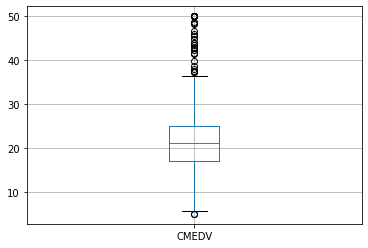

In [ ]:
df.boxplot(column=['CMEDV'])

-----

### 2-2) 회귀 분석 설명 변수 탐색

##### 설명 변수들의 분포 탐색

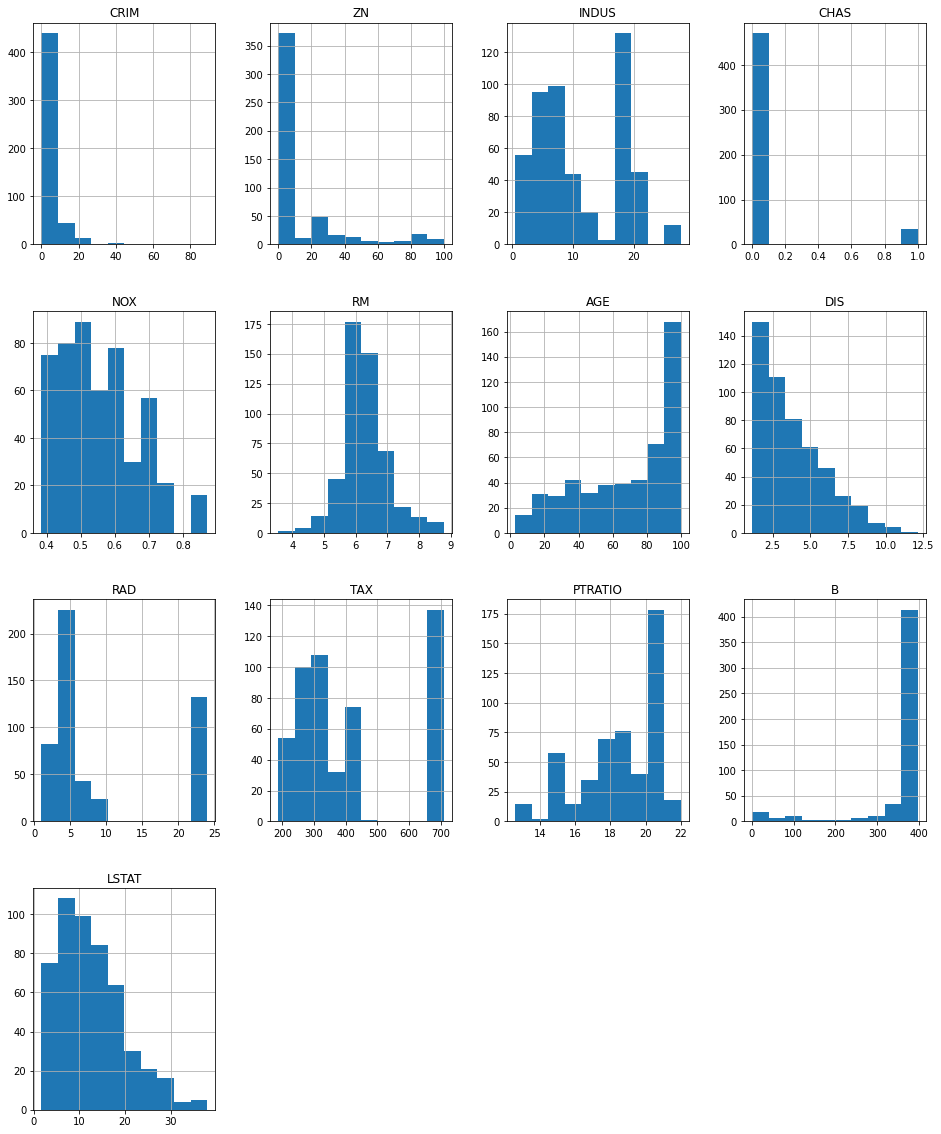

In [ ]:
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
fig = plt.figure(figsize = (16,20))
ax = fig.gca()

df[numerical_columns].hist(ax=ax)
plt.show()

##### 설명 변수들의 상관관계 탐색

In [ ]:
cols = ['CMEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
corr = df[cols].corr(method='pearson')

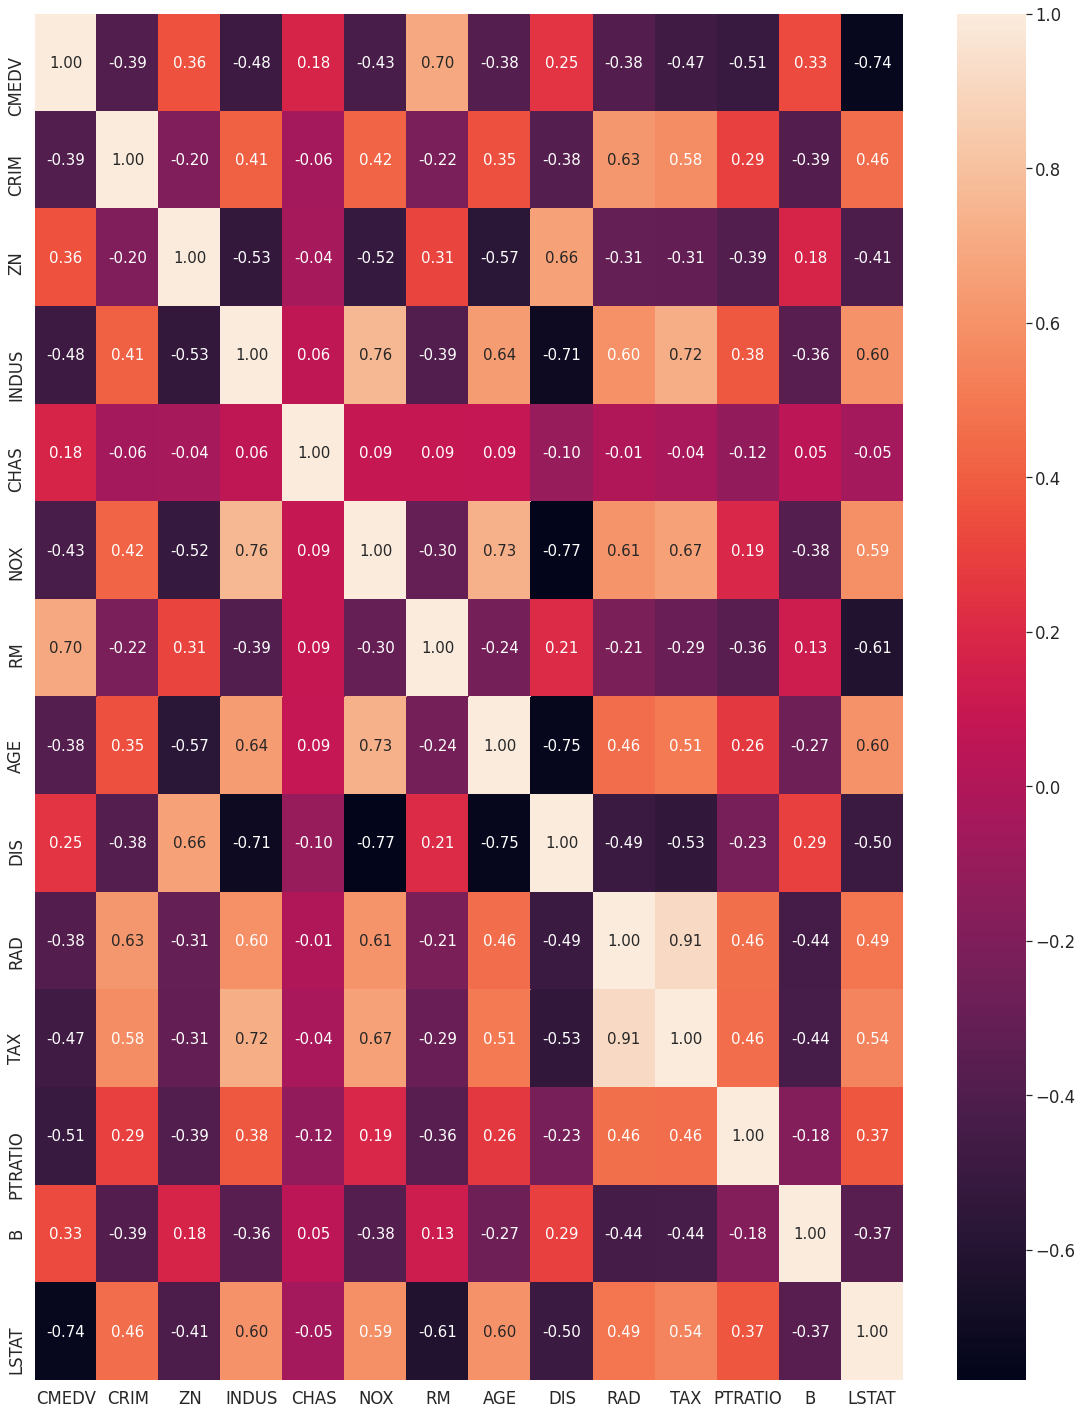

In [ ]:
fig = plt.figure(figsize=(16,20))
ax=fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values, annot=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols, xticklabels=cols, ax=ax)
plt.tight_layout()
plt.show()

##### 설명 변수와 종속 변수의 관계 탐색

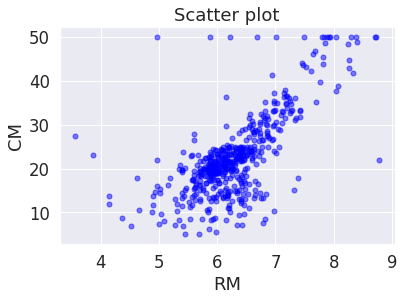

In [ ]:
# RM은 방의 개수
plt.plot('RM', 'CMEDV', data=df, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title("Scatter plot")
plt.xlabel('RM')
plt.ylabel('CM')
plt.show()

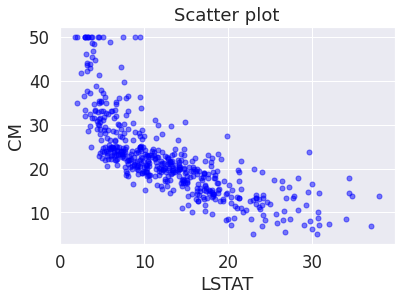

In [ ]:

plt.plot('LSTAT', 'CMEDV', data=df, linestyle='none', marker='o', markersize=5, color='blue', alpha=0.5)
plt.title("Scatter plot")
plt.xlabel('LSTAT')
plt.ylabel('CM')
plt.show()

##### 지역별 차이 탐색

In [ ]:
df['TOWN'].value_counts()


Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Hull                  1
Hamilton              1
Medfield              1
Lincoln               1
Dover                 1
Name: TOWN, Length: 92, dtype: int64

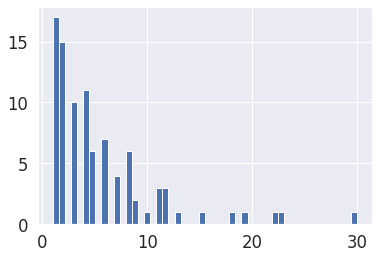

In [ ]:
df['TOWN'].value_counts().hist(bins=50)

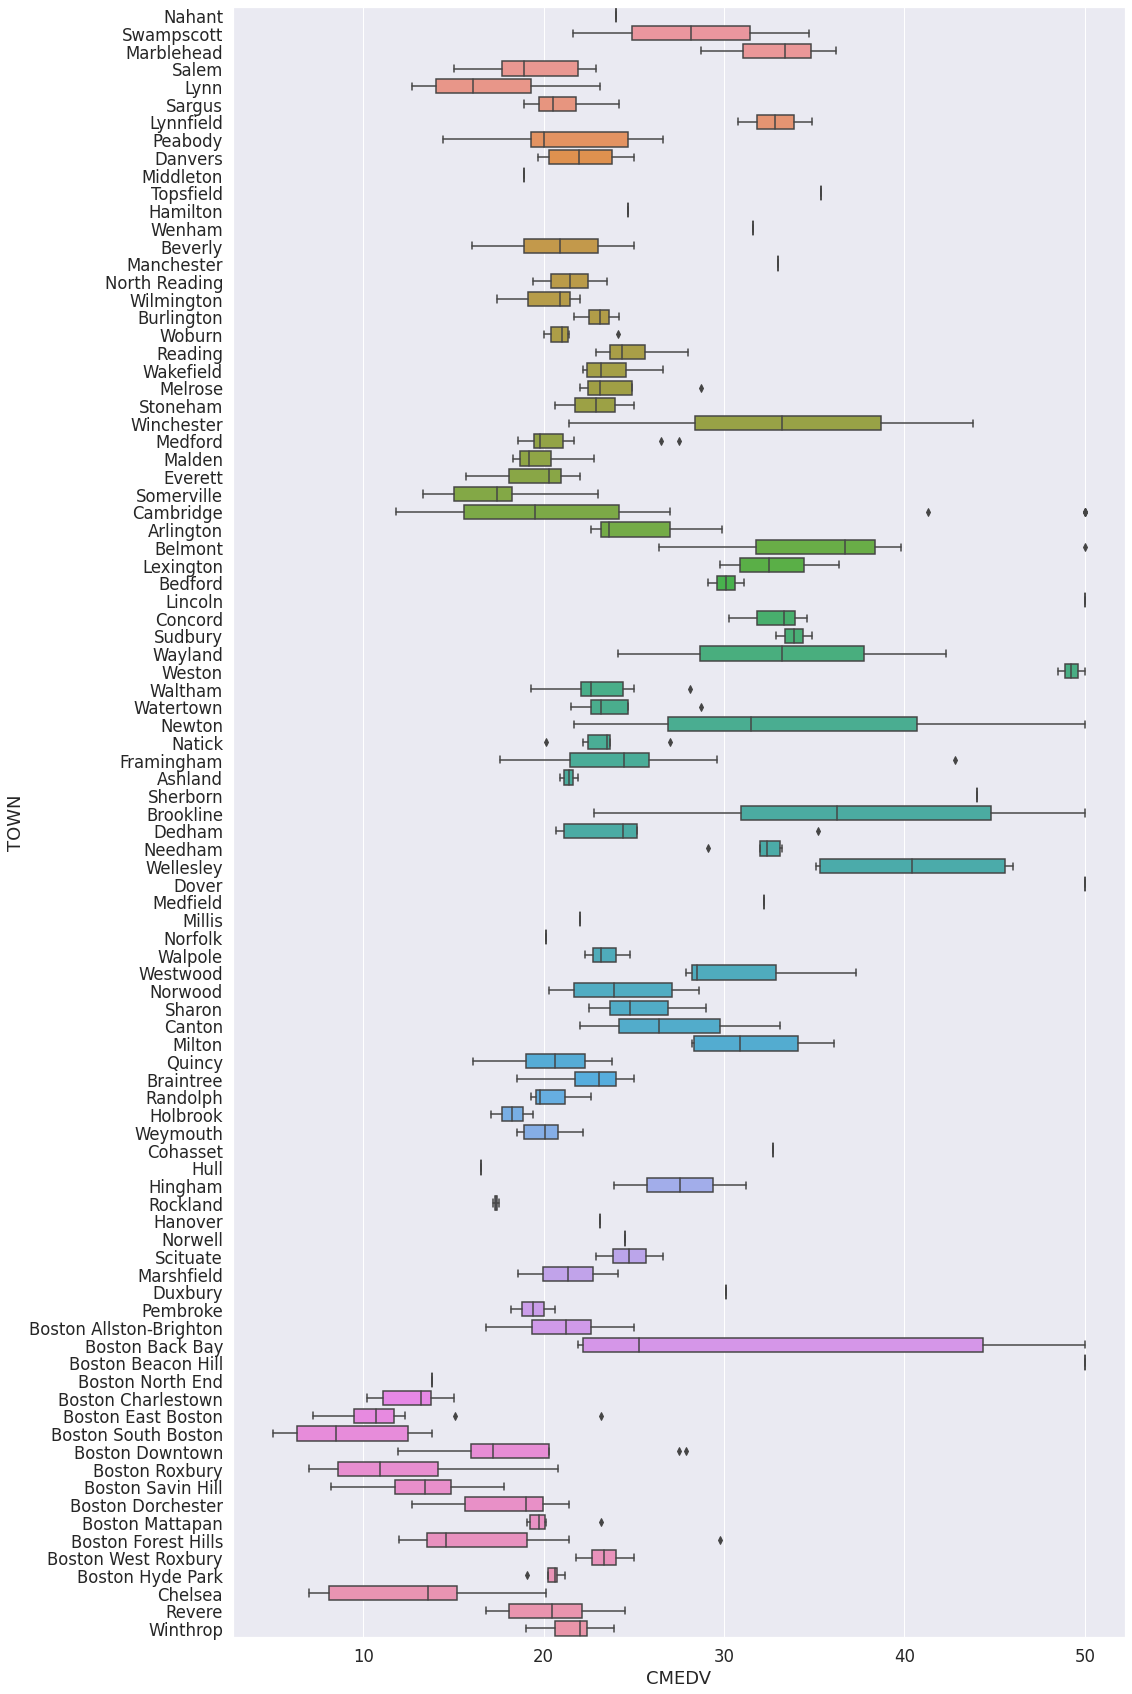

In [ ]:
fig = plt.figure(figsize=(16,30))
ax=fig.gca()

sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)

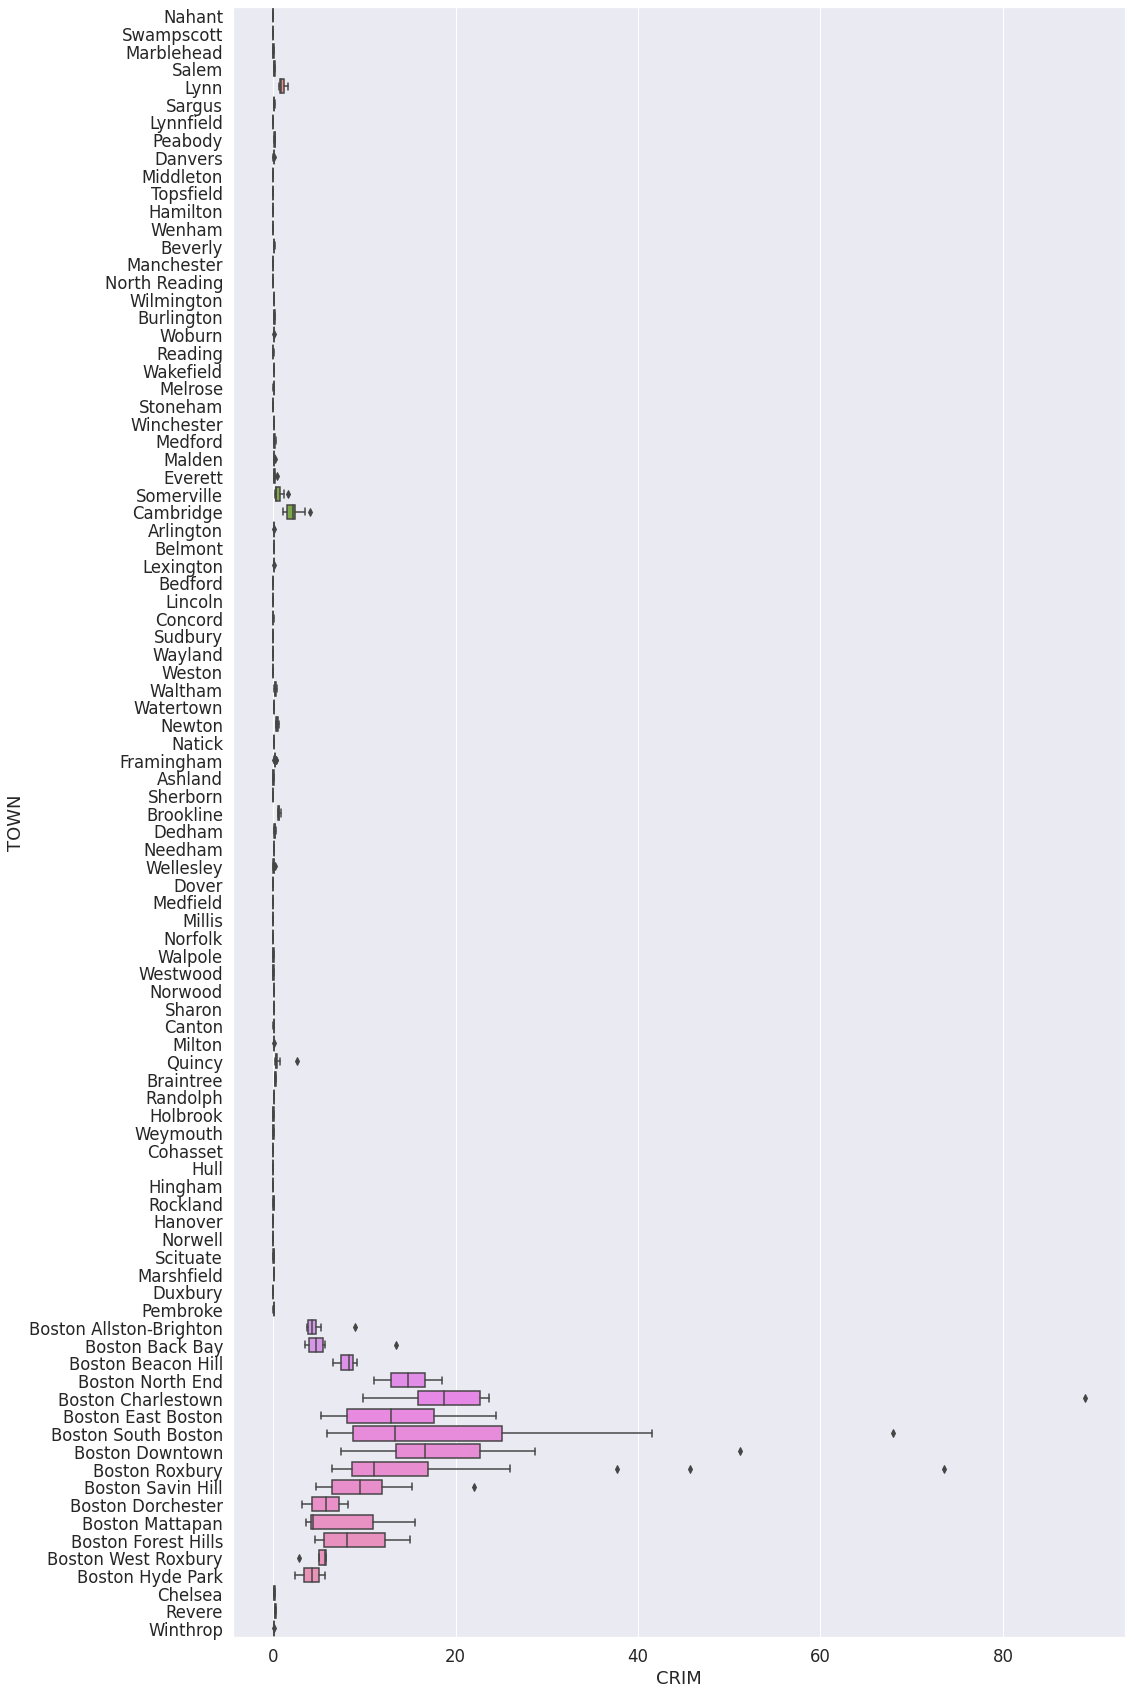

In [ ]:
fig = plt.figure(figsize=(16,30))
ax=fig.gca()

sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

-----

## 3) 집값 예측 분석 : 회귀분석

### 3-1) 데이터 전처리

##### 피처 표준화

In [ ]:
from sklearn.preprocessing import StandardScaler

# feature standardization
scaler = StandardScaler()
scale_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [ ]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


##### 데이터셋 분리

In [ ]:
from sklearn.model_selection import train_test_split
X = df[scale_columns]
y = df['CMEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [ ]:
X_train.shape

(404, 13)

-----

### 3-2) 회귀 분석 모델 학습

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
# train regression model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [ ]:
print(lr.coef_)

[-0.95549078  1.18690662  0.22303997  0.76659756 -1.78400866  2.83991455
 -0.05556583 -3.28406695  2.84479571 -2.33740727 -1.77815381  0.79772973
 -4.17382086]


In [ ]:
plt.rcParams['figure.figsize'] = [12,16]

coefs = lr.coef_.tolist()
coefs_series = pd.Series(coefs)

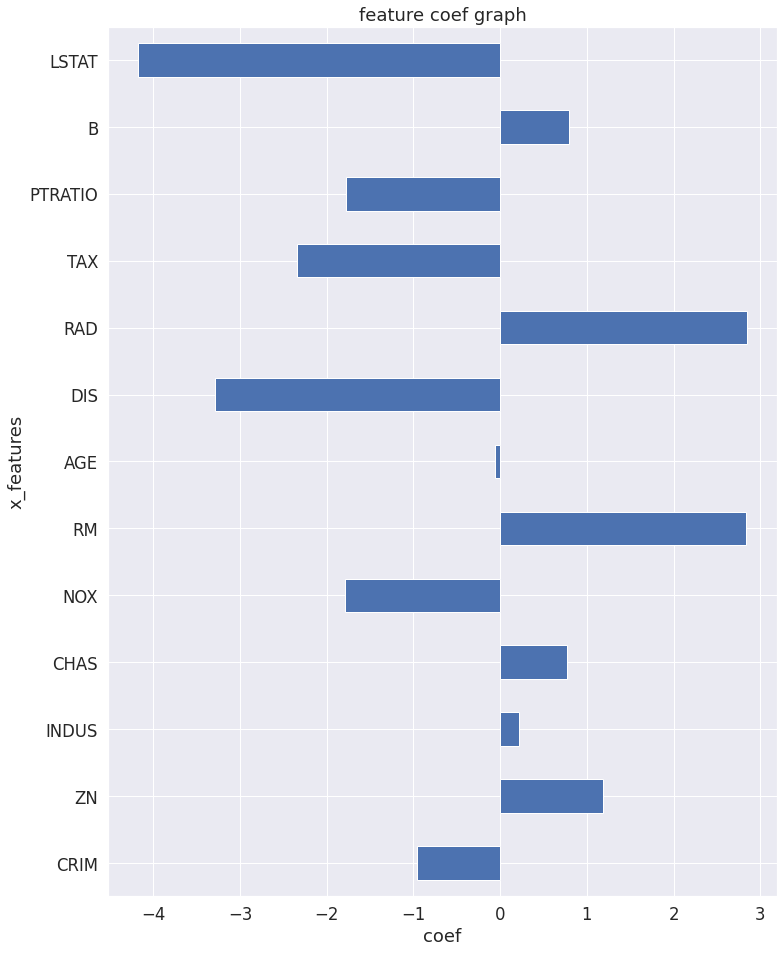

In [ ]:
x_labels=scale_columns
ax = coefs_series.plot.barh()
ax.set_title('feature coef graph')
ax.set_xlabel('coef')
ax.set_ylabel('x_features')
ax.set_yticklabels(x_labels)
plt.show()

-----

### 3-3) 학습 결과 해석

##### R2 score, RMSE score 계산

In [ ]:
print(model.score(X_train, y_train))

0.7490284664199387


In [ ]:
print(model.score(X_test, y_test))

0.700934213532155


In [ ]:
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

4.672162734008587
4.61495178491331


##### 피처 유의성 검정

In [ ]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.54
Date:                Mon, 22 Feb 2021   Prob (F-statistic):          2.61e-108
Time:                        03:30:25   Log-Likelihood:                -1196.1
No. Observations:                 404   AIC:                             2420.
Df Residuals:                     390   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4800      0.238     94.635      0.000      22.013      22.947
CRIM          -0.9555      0.299     -3.192      0.002      -1.544      -0.367
ZN             1.1869      0.353      3.362      0.001       0.493       1.881
INDUS          0.2230      0.470      0.475      0.635      -0.700       1.147
CHAS           0.7666      0.238      3.227      0.001       0.300       1.234
NOX           -1.7840      0.512     -3.482      0.001      -2.791      -0.777
RM             2.8399      0.326      8.723      0.000       2.200       3.480
AGE           -0.0556      0.410     -0.135      0.892      -0.862       0.751
DIS           -3.2841      0.491     -6.695      0.000      -4.248      -2.320
RAD            2.8448      0.650      4.375      0.000       1.566       4.123
TAX           -2.3374      0.717     -3.259      0.001      -3.748      -0.927
PTRATIO       -1.7782      0.312     -5.700      0.000      -2.391      -1.165
B              0.7977      0.293      2.725      0.007       0.222       1.373
LSTAT         -4.1738      0.405    -10.317      0.000      -4.969      -3.378
==============================================================================
Omnibus:                      167.528   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.057
Skew:                           1.774   Prob(JB):                    1.00e-167
Kurtosis:                       8.753   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 다중 공선성

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Facotr"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [ ]:
vif.head()

,VIF Facotr
0,1.008141
1,1.731807
2,2.222212
3,3.857543
4,1.076206


In [ ]:
vif["feature"] = X_train.columns
vif.round(1)

,VIF Facotr,feature
0,1.0,const
1,1.7,CRIM
2,2.2,ZN
3,3.9,INDUS
4,1.1,CHAS
5,4.4,NOX
6,1.9,RM
7,3.1,AGE
8,4.1,DIS
9,6.9,RAD
